# **Map Conjugacy for the Mackey-Glass DDE**

In [20]:
import numpy as np
from utils import MackeyGlass, values_before_zero
from ddeint import ddeint # ddeint is require to integrate the delay equation
import matplotlib.pyplot as plt

# Set plotting parameters
parameters = {'axes.labelsize': 16,
              'axes.titlesize': 18,
              'legend.fontsize': 13,
              'xtick.labelsize': 16,
              'ytick.labelsize': 16,
              'figure.figsize': (12, 8),
              'figure.titlesize': 18,
              'font.serif': 'Computer Modern Roman',
             }
plt.rcParams.update(parameters)
plt.rc('text', usetex=True)

## **Generate Measurement Data**

In [21]:
# Continuous-time simulation data

# Initializations
dt = .005
t_span = np.arange(0, 100, dt) 
  
# Solution data
xsol = []
xsol = ddeint(MackeyGlass, values_before_zero, t_span)

Text(0, 0.5, '$x(t-2)$')

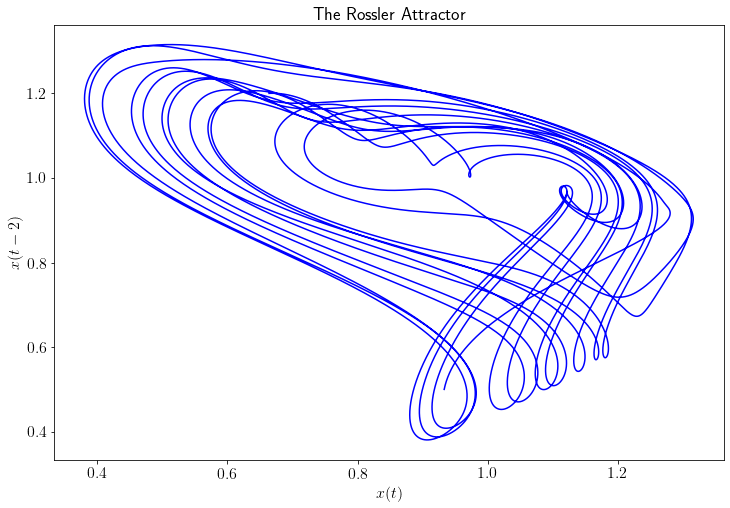

In [22]:
# Plot Rossler Solution (x_2 vs. x_1)

lag = int(2/dt)

plt.plot(xsol[lag:15000],xsol[:15000-lag],'b')
plt.title("The Rossler Attractor")
plt.xlabel("$x(t)$")
plt.ylabel("$x(t-2)$")

In [23]:
# Create section data 

Psec = []
temp = [0]*len(xsol)
count = 0

# Two possible sections here - comment one out to use the other
for m in range(len(temp)-1):
    if xsol[m-lag] - xsol[m] >= 0 and xsol[m+1-lag] - xsol[m+1] <= 0 and xsol[m] < 0.96:
    #if xsol[m-1] - xsol[m] >= 0 and xsol[m+1] - xsol[m] >= 0 and xsol[m] < 0.8:    
        temp[count] = xsol[m+1]
        count = count + 1
Psec.append(np.array(temp[1:count]))   

xn, xnp1 = Psec[0][:-1], Psec[0][1:]

#Scale data
max_xn = xn.max()
min_xn = xn.min()

slope = 1/(max_xn - min_xn)
yint = -slope*min_xn

xn = slope*xn + yint
xnp1 = slope*xnp1 + yint

# Build input data matrix of forward iterates
forward_iters = 10
xnforward = []

xnp1 = xnp1[:-forward_iters] 
for j in range(forward_iters): 
    xnforward.append(xn[j:-forward_iters+j])

Text(0, 0.5, '$x_{n+1}$')

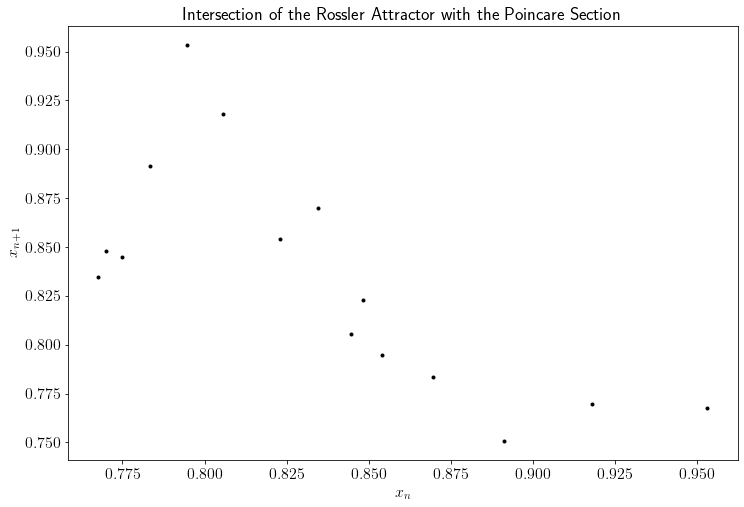

In [24]:
# Plot Rossler Section Data

plt.plot(Psec[0][:-1],Psec[0][1:],'k.')
plt.title("Intersection of the Rossler Attractor with the Poincare Section")
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")

## **Network Training**

In [32]:
import tensorflow as tf
from architecture_1D import Conjugacy

width = 200
size_x = 1 #number of x variables
degree = 2 #degree of latent mapping
activation = 'selu'
steps = 2
numblks_in = 4
numblks_out = 4
c1 = 3.5 # initialized mapping coefficients
c2 = -3.5
c3 = 0.0
c4 = 0.0
c5 = 0.0
learning_rate = 0.00001

conjugacy = Conjugacy(width, size_x, activation, degree, steps, numblks_in, numblks_out, c1, c2)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10) # patience is set intentially low to speed up examples

optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
conjugacy.compile(optimizer=optimizer, loss = 'mse')

conjugacy.fit(xnforward, xnp1, callbacks = [callback], epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 913us/step - loss: 84.3208
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 55.7711
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 36.7768
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 24.2766
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 16.0920
Epoch 6/1000
1/1 [==============================] - 0s 985us/step - loss: 11.1475
Epoch 7/1000
1/1 [==============================] - 0s 721us/step - loss: 8.1760
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.1353
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.7012
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.7109
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0202
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.5715
Epoch 13/1000
1/1 [==================

## **Network Output**

In [33]:
# Print Discovered Mapping

print('Discovered Conjugate Mapping:')
print('')
print('g(y) =',conjugacy.c1.numpy(),'*y +',conjugacy.c2.numpy(),'*y^2')

# Network Summary
print('')
conjugacy.summary()

Discovered Conjugate Mapping:

g(y) = 3.4998837 *y + -3.4998991 *y^2

Model: "conjugacy_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (None, 1)                 121201    
_________________________________________________________________
sequential_15 (Sequential)   (None, 1)                 121201    
Total params: 242,407
Trainable params: 242,404
Non-trainable params: 3
_________________________________________________________________
